In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import scipy
import csv
import re
import glob
from sklearn.utils import shuffle

In [2]:
from my_toolkit.utils.data import datasets

In [3]:
path = '/scratch2/chaoyi/DarkMachines/sm/'
dataset = datasets.ReadCSVData(glob.glob(path+'min_20000/*.csv'))

In [4]:
dataset.data.process.unique()

array(['ttbarZ', 'ztop', 'atop', 'ttbarHiggs', 'ttbarWW', 'ttbarW',
       '4top', 'ztopbar', 'ttbarGam', 'atopbar', 'singlehiggs'],
      dtype=object)

In [5]:
labels = [r'$t\bar tW^\pm$', r'$Z\bar t(+2j)$', r'$t\bar tW^+ W^-$', r'$t\bar th(+1j)$', r'$t\bar tt\bar t$', r'$t\bar t\gamma(+2j)$',
         r'$h(+2j)$', r'$Zt(+2j)$', r'$\gamma\bar t(+2j)$', r'$t\bar tZ$', r'$\gamma t(+2j)$']

In [6]:
label_dic = dict(zip(dataset.data.process.unique(), labels))

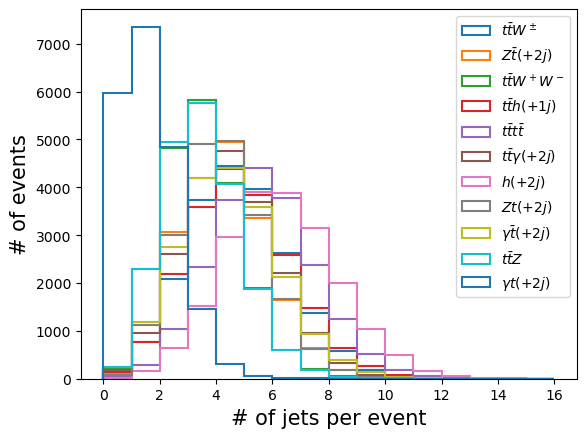

In [7]:
bins = np.linspace(0, 16, 17)
num_jets = np.sum(dataset.objects()=='j', axis=1)

for i in dataset.data.process.unique()[:]:
    plt.hist(num_jets[dataset.data.process==i], bins, histtype='step', lw=1.5, label=label_dic[i])
plt.legend()
plt.xlabel('# of jets per event', size=15)
plt.ylabel('# of events', size=15)
plt.show()

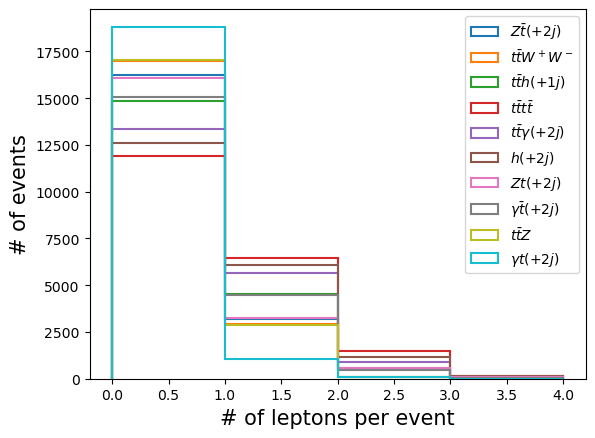

In [8]:
bins = np.linspace(0, 4, 5)
lep_mask = (dataset.objects()=='e-') | (dataset.objects()=='e+') | (dataset.objects()=='m-') | (dataset.objects()=='m+')
num_leps = np.sum(lep_mask, axis=1)

for i in dataset.data.process.unique()[1:]:
    plt.hist(num_leps[dataset.data.process==i], bins, histtype='step', lw=1.5, label=label_dic[i])
plt.legend()
plt.xlabel('# of leptons per event', size=15)
plt.ylabel('# of events', size=15)
plt.show()

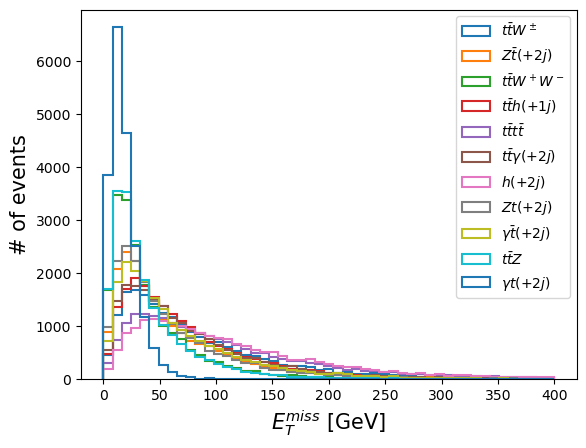

In [9]:
bins = np.linspace(0, 4e2, 50)

for i in dataset.data.process.unique()[:]:
    plt.hist(dataset.data.MET[dataset.data.process==i]/1000, bins, histtype='step', lw=1.5, label=label_dic[i])
plt.xlabel(r'$E^{miss}_T$ [GeV]', size=15)
plt.ylabel('# of events', size=15)
plt.legend()
plt.show()

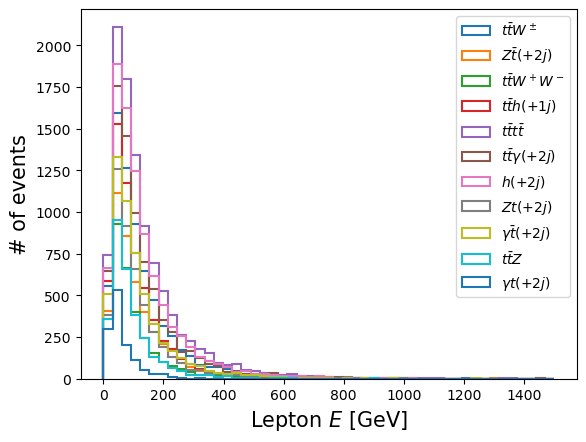

In [10]:
lep_mask = (dataset.objects()=='e-') | (dataset.objects()=='e+') | (dataset.objects()=='m-') | (dataset.objects()=='m+')
object_E = dataset.data.values[:,6::5]
lep_E = (object_E*lep_mask)

bins = np.linspace(1e-3, 1.5e3, 50)
for i in dataset.data.process.unique()[:]:
    leps_E = lep_E[dataset.data.process==i].flatten()/1000
    leps_E = leps_E[~pd.isnull(leps_E)]
    plt.hist(leps_E, bins, histtype='step', lw=1.5, label=label_dic[i])
plt.xlabel(r'Lepton $E$ [GeV]', size=15)
plt.ylabel('# of events', size=15)
plt.legend()
plt.show()

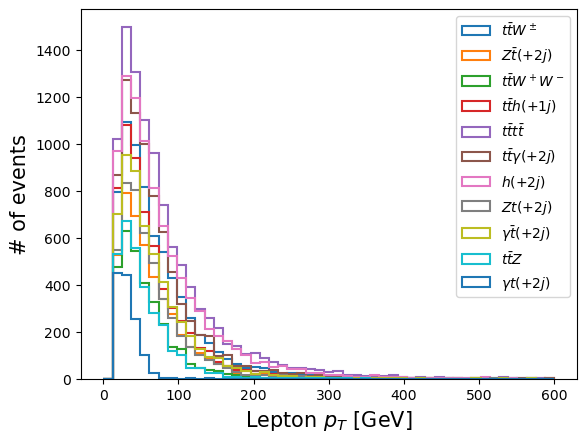

In [11]:
lep_mask = (dataset.objects()=='e-') | (dataset.objects()=='e+') | (dataset.objects()=='m-') | (dataset.objects()=='m+')
object_pt = dataset.data.values[:,7::5]
lep_pt = (object_pt*lep_mask)

bins = np.linspace(1e-3, 6e2, 50)
for i in dataset.data.process.unique()[:]:
    leps_pt = lep_pt[dataset.data.process==i].flatten()/1000
    leps_pt = leps_pt[~pd.isnull(leps_pt)]
    plt.hist(leps_pt, bins, histtype='step', lw=1.5, label=label_dic[i])
plt.xlabel(r'Lepton $p_T$ [GeV]', size=15)
plt.ylabel('# of events', size=15)
plt.legend()
plt.show()